## First Look to the Dataset

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [73]:
sns.set_style('darkgrid')

## Table of Content
  
<ul>
    <li>
        <a href="#intro">Introduction</a>
        <ul>
            <li><a href="#description">Dataset Description</a></li>
            <li><a href="#load">Loading the Dataset</a></li>
        </ul>
    </li>
    <li><a href="#questions">Questions to Answer</a></li>
    <li>
        <a href="#wrangling">Data Wrangling</a>
        <ul>
            <li><a href="#drop_columns">Dropping Columns</a></li>
            <li><a href="#drop_nulls">Dropping Null Values</a></li>
            <li><a href="#drop_duplicates">Dropping Duplicates</a></li>
            <li><a href="#changing_index">Changing the `index` Column</a></li>
            <li><a href="#cleaning_datatypes">Cleaning Data Types</a></li>
        </ul>
    </li>
    <li>
        <a href="#eda">EDA (Exploratory Data Analysis)</a>
        <ul>
            <li><a href="#replacing_zeros">Replacing Zero Values</a></li>
            <li><a href="#drop_zero_budget">Dropping Zero Budget Values</a></li>
        </ul>
    </li>
    <li>
        <a href="#answering_questions">Answering Questions</a>
        <ul>
            <li><a href="#popularity_questions">Popularity Related Questions</a></li>
            <li><a href="#director_questions">Director Related Questions</a></li>
            <li><a href="#runtime_questions">Runtime Related Questions</a></li>
            <li><a href="#genre_questions">Genre Related Questions</a></li>
            <li><a href="#company_questions">Production Company Related Questions</a></li>
            <li><a href="#budget_questions">Budget and Revenue Related Questions</a></li>
            <li><a href="#release_questions">Released Year Related Questions</a></li>
        </ul>
    </li>
</ul>

<h2 id="intro">Introduction</h2>

<h3 id="description">Dataset Description</h3>  
  
This is a dataset about movies collected from TMDb. Using this dataset we will analyze and find out what are the key features that lead to a commercial success or flop.

> The dataset have the following attributes
>   - **Data Points (Rows)**: 10806
>   - **Columns**: 21
>   - **Column Names**:       
>        - id: Identification Number
>        - imdb_id: IMDb Identification Number
>        - popularity: Popularity in number
>        - budget: Gross Budget
>        - revenue: Gross Revenue
>        - original_title: Title of the Movie
>        - cast: Cast
>        - homepage: Movie website homepage
>        - director: The person who directed the movie
>        - tagline: 
>        - keywords: 
>        - overview: Overview of the movie 
>        - runtime: How long the movie last
>        - genres: What genres the movie belong to
>        - production_companies: What are the companies produced the movie
>        - release_date: The date the movie was released
>        - vote_count: How many people voted for the movie
>        - vote_average: The average vote rate our of 10
>        - release_year: Released Year
>        - budget_adj: Movie Budget including 2010 inflnation
>        - revenue_adj': Movie Revenue including 2010 inflnation

<h3 id="load">Loading the Dataset</h3>

In [74]:
tmdb = pd.read_csv("./Datasets/tmdb-movies.csv", sep=",", parse_dates=True)
tmdb.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [75]:
tmdb.shape

(10866, 21)

In [76]:
tmdb.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

<h2 id="questions">Questions to Answer</h2>

Using the above loaded data, I will try to answer the following listed Questions.  
I categorized questions about a specific column to fall under the same column. 

- **Popularity**
  1. Are the most popular movies a commercial success? What is the ratio?
  2. Which movies are commercially successful but not popular?
  3. Which movies have the highest `popularity` vs `vote_count` ratio??
  
- **Budget and Revenue**
  1. What is the average budget for both commercial successful as well as flopped movies?
  1. How much percent of the Movies are Commercially successful as well as Flopped?
  2. What are the features associated with high revenue?
      - What are their relationship with Production Company, Budget, Director, and Cast features?
  3. Does having more budget mean getting more popularity?
  4. What are the movies that got high revenue proportion to their budget?
  5. Does the `budget` and `revenue` growing over the years?
  
- **Director**
  1. Who is the most popular Director?
      - How many movies he/she directed?
      - What are his/her top 5 commercially successful and flopped movies?
      - What year was his/her most popular movie released?
  2. How many movies he/she directed per year?
      - What are the proportions of their success and flop?
  
- **Runtime**
  1. What is the runtime for most popular movies and flopped ones?
  2. Which movies got high revenue as compared to the same runtime movies?
  3. Which runtime got a better rate?
  4. Average runtime of movies each year?
  5. What is runtime's average popularity rate?
  
- **Genre**
  1. Which genres are most popular?
  2. Which genres are more successful and flopped?
  3. What is genre's average vote rate?
  4. What genre is popular each year?
  5. How many the same genre movies released each year?
  
- **Production Company**
  1. Which production companies are most popular?
  2. What are the proportion of successful and flopped movies produced?
  3. How many movies a production company produce per year?
  
- **Released Year**
  1. What year was the most successful year in the movie industry?
      - How many successful movies got released that year?
      - What was their average budget?
  2. What year was the most unsuccessful year in the movie industry?
      - How many flopped movies got released that year?
  4. Which year has the highest release of movies?
      - Which month has the highest release of movies 
  5. Which month has the highest release of movies in all of the years?
  6. Which month Made The Highest Average Revenue?
  7. What is the proportion of popularity for each year?
  8. Which year has the highest ratio of popular movies?

<h2 id="wrangling">Data Wrangling</h2>
  
Before we cleaned up anything, let's first explore what columns contain Null values, what are duplicated rows

In [77]:
tmdb.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<h3 id="drop_columns">Dropping Columns</h3>

From above there are a lot of columns with null values but we don't need all of the columns for our analysis. That means we can drop them.  
  
Let's drop the columns: `homepage`, `tagline`, `keywords`, `imdb_id`, `overview`, `budget_adj`, `revenue_adj`

In [78]:
tmdb.drop(columns=['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj'], inplace=True)
tmdb.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015


<h3 id="drop_nulls">Dropping Null Values</h3>

Let's drop a data point with any `Null` value.

In [79]:
tmdb.dropna(axis=0, inplace=True)
tmdb.shape

(9773, 14)

Let's check for null values again

In [80]:
tmdb.isna().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

<h3 id="drop_duplicates">Dropping Duplicates</h3>

Let's look for how many duplicates we have in our dataset.

In [81]:
tmdb.duplicated().sum()

1

Let' take a glance look at the duplicated data points to find out if they need to be dropped or keep them.

In [82]:
tmdb[tmdb.duplicated(keep=False)]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
2089,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010


Because it is just one data point and the same duplicate, let's drop it.

In [83]:
tmdb.drop_duplicates(inplace=True)

Let's check if there aren't any duplicates

In [84]:
tmdb.duplicated().sum()

0

<h3 id="changing_index">Changing the Index Column</h3>

Let's set `id` column as index

In [85]:
tmdb.set_index('id', inplace=True)

<h3 id="cleaning_datatypes">Cleaning Data Types</h3>

In this section, we will take a look at the datatypes of each column. If there are columns we should change to other types, we will do so. For example, `released_date` column  
  
We will also change the format of some columns. For example, the `popularity` column is in millions but the `vote_count` is in thousands which doesn't make sense if we were to consider vote count distribution over popularity.

In [86]:
tmdb.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

Let's change `released_date` datatype from `object` to `datetime`   
  
Since any programming language starting point in time and date is `1971`, we need to replace the year part in `released_date` by `released_year`.  
If we don't replace them `12/3/60` will be converted to `2060-03-12` instead of being `1996-03-12`

In [87]:
# Replace the year part with the `release_year` column
tmdb.release_date = tmdb.apply(lambda x: x.release_date[:-2] + str(x.release_year), axis=1)

# Converting the datatype
tmdb.release_date = pd.to_datetime(tmdb.release_date)

Let's change the `vote_count` column to millions

In [88]:
tmdb.vote_count = tmdb.vote_count / 1000000

Final check

In [89]:
tmdb.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                     float64
vote_average                   float64
release_year                     int64
dtype: object

<h2 id="eda">EDA (Exploratory Data Analysis)</h2>

In this section, we will ask question from our <a href="#questions">question pool</a> and give an answer through EDA then we will visualize them.  
  
Let's take a general look at our dataset if it is ready to be processed

In [90]:
tmdb.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000
mean,0.694721,1.617967e+07,4.423121e+07,102.926627,0.000239,5.963528,2000.878428
std,1.036931,3.221074e+07,1.225889e+08,27.877432,0.000603,0.913174,13.036794
min,0.000188,0.000000e+00,0.000000e+00,0.000000,0.000010,1.500000,1960.000000
25%,0.232710,0.000000e+00,0.000000e+00,90.000000,0.000018,5.400000,1994.000000
50%,0.419762,2.000000e+05,0.000000e+00,100.000000,0.000046,6.000000,2005.000000
75%,0.776408,1.928750e+07,3.104729e+07,112.000000,0.000173,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,0.009767,8.700000,2015.000000


The above description clearly shows us there are missing (Not Null but 0) values for `budget`, `revenue`, and `runtime`.  
Let's take a look how many of them have a value of 0.

In [91]:
tmdb[['budget', 'revenue', 'runtime']].apply(lambda x: x == 0).sum()

budget     4751
revenue    5022
runtime      13
dtype: int64

Dropping the data points having `0` value for the `runtime` might not bring a damage to our dataset but the others do.  
If we drop them we lose a huge amount of data from our dataset. So, let's fill them with their `mean`.  
To make it the distribution fair, we fill the values by the `mean` of their respective `released_year`.  
  
Before we do that, let's check whether the `budget` column has a `0` value mean the `revenue` value is `0` or not

In [92]:
tmdb[(tmdb.budget == 0) & (tmdb.revenue == 0)].shape

(3806, 13)

In [93]:
tmdb[(tmdb.budget != 0) & (tmdb.revenue == 0)].shape

(1216, 13)

From the above codes, we understand "if a `budget` column is `0` the `revenue` column will also be `0`".

<h3 id="replacing_zeros">Replacing Zero Values</h4>

It's time to replace the zero values by their respective `release_year` column `mean` values.  

Let's first replace the values for `budget`, `revenue`, and `runtime`.  
  
**NOTE**:
- For `revenue` column filling the whole `0` values with `mean` doesn't make any sense.
- What if the movie actually doesn't generate any `revenue`?
- For this reason we only fill the `revenue` columns having `0` value for their `budget` column as well.

In [94]:
# A function to replace `0` values
def replace_zeros(row: pd.DataFrame, columns: list, data_frame: pd.DataFrame):
    """Replace zeros with the corresponding values

    Args:
        row (pd.Series): A row or data point
        columns (list): A column or columns to replace their value
        data_frame (pd.DataFrame): A data frame which hold a value to replace zero
    """
    if (row[columns] == 0).all():
        row[columns] = data_frame.loc[row.release_year, columns]
        
    return row

Let's calculate the mean values for each year and columns

In [95]:
year_mean = tmdb.groupby('release_year')[['budget', 'revenue', 'runtime']].mean()
year_mean.describe()

,budget,revenue,runtime
count,5.600000e+01,5.600000e+01,56.000000
mean,1.079232e+07,3.354417e+07,106.551889
std,9.031786e+06,1.784543e+07,5.468500
min,6.892796e+05,1.925834e+06,97.281362
25%,2.530778e+06,1.998826e+07,103.402211
50%,7.214590e+06,3.419167e+07,106.427703
75%,1.821224e+07,4.854581e+07,109.097091
max,2.926633e+07,6.619554e+07,125.833333


Let's subset our dataset before we perform operation on it

In [96]:
missing_budget_revenue = tmdb[(tmdb.budget == 0) & (tmdb.revenue == 0)]
missing_budget_revenue.shape

(3806, 13)

Let's perform the replacement

In [97]:
missing_budget_revenue = missing_budget_revenue.apply(
    lambda x: replace_zeros(x, ['budget', 'revenue'], year_mean),
    axis=1)

tmdb[tmdb.index.isin(missing_budget_revenue.index)] = missing_budget_revenue

# Free up memory
del missing_budget_revenue

# Other mechanism
# tmdb = tmdb.apply(lambda x: replace_zeros(x, ['budget', 'revenue'], year_mean), axis=1).head()

Let's check if it worked as intended

In [98]:
tmdb[(tmdb.budget == 0) & (tmdb.revenue == 0)].shape

(0, 13)

Let's now address the `runtime` column 

In [99]:
# Filtering
missing_runtime = tmdb[tmdb.runtime == 0]

# replacing zeros
missing_runtime = missing_runtime.apply(lambda x: replace_zeros(x, ['runtime'], year_mean), axis=1)

# replace on the main dataset
tmdb[tmdb.index.isin(missing_runtime.index)] = missing_runtime

# Free up memory
del missing_runtime, year_mean

Let's check if it worked as intended

In [100]:
tmdb[tmdb.runtime == 0].shape

(0, 13)

Let's check the description, to see if we need further cleaning

In [101]:
tmdb.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000
mean,0.694721,2.214154e+07,6.086234e+07,103.057654,0.000239,5.963528,2000.878428
std,1.036931,3.034473e+07,1.185776e+08,27.623684,0.000603,0.913174,13.036794
min,0.000188,0.000000e+00,0.000000e+00,3.000000,0.000010,1.500000,1960.000000
25%,0.232710,5.000000e+06,7.362011e+06,91.000000,0.000018,5.400000,1994.000000
50%,0.419762,1.500000e+07,3.964697e+07,100.000000,0.000046,6.000000,2005.000000
75%,0.776408,2.451125e+07,5.227538e+07,112.000000,0.000173,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,0.009767,8.700000,2015.000000


We still have empty value for `budget` column which doesn't make any sense. A movie has to have a `budget` so let's drop the data points with zero `budget` values

<h3 id="drop_zero_budget">Dropping Zero Budget Values</h3>

In [102]:
tmdb[tmdb.budget == 0].shape

(945, 13)

In [103]:
tmdb.shape

(9772, 13)

In [104]:
tmdb.drop(tmdb[tmdb.budget == 0].index, inplace=True)
tmdb.shape

(8827, 13)

Let's check the description once again

In [105]:
tmdb.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,8827.000000,8.827000e+03,8.827000e+03,8827.000000,8827.000000,8827.000000,8827.000000
mean,0.716565,2.451196e+07,6.538610e+07,103.030859,0.000256,5.952011,2001.056644
std,1.081815,3.100455e+07,1.235158e+08,27.890449,0.000631,0.923038,13.067161
min,0.000188,1.000000e+00,0.000000e+00,3.000000,0.000010,1.500000,1960.000000
25%,0.229921,8.000000e+06,1.111653e+07,90.000000,0.000018,5.400000,1995.000000
50%,0.420671,1.658190e+07,4.248739e+07,99.000000,0.000046,6.000000,2005.000000
75%,0.802777,2.600000e+07,5.380743e+07,112.000000,0.000185,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,0.009767,8.700000,2015.000000


Finally we got almost cleaned data. Let's now jump into answering the questions

<h2 id="answering_questions">Answering Questions</h2>

Before we start answering questions, let's compute the net profit of the movies and store it in `net_profit` column.  
  
<!-- **NOTE**: When we refer to the most successful or flopped of something, we are always referring the number `20`, i.e., top or bottom `20`. -->

In [106]:
tmdb['net_profit'] = tmdb.revenue - tmdb.budget
tmdb.net_profit.head()

id
135397    1.363529e+09
76341     2.284364e+08
262500    1.852382e+08
140607    1.868178e+09
168259    1.316249e+09
Name: net_profit, dtype: float64

Again before we start answering questions, let's first filter out the successful and flopped movies and build DataFrame for each,
- Let's consider successful ones as movies those earned more than 75% of their budget.
- Let's consider flopped ones as movies those earned less than 25% of their budget.

In [228]:
tmdb.net_profit.describe()

count    8.827000e+03
mean     4.087414e+07
std      1.039485e+08
min     -4.139124e+08
25%     -5.500000e+04
50%      2.586031e+07
75%      3.435121e+07
max      2.544506e+09
Name: net_profit, dtype: float64

In [231]:
tmdb[tmdb.net_profit <= -5.500000e+04].shape, tmdb[tmdb.net_profit >= 3.435121e+07].shape

((2207, 16), (2289, 16))

In [175]:
# Calculating net profit percentile
net_profit_percentile = tmdb.assign(net_profit_budget_proportion=lambda x: (x.net_profit / x.budget * 100))
net_profit_percentile = net_profit_percentile.sort_values('net_profit_budget_proportion', axis=0, ascending=False)

# Let's check what are the values for `25` and `75` percentiles
# net_profit_percentile.net_profit_budget_proportion.describe()

In [184]:
successful.shape, flopped.shape

((2290, 17), (2207, 17))

In [187]:
# successful = net_profit_percentile[net_profit_percentile.net_profit_budget_proportion >= 2.524777e+02]
# flopped = net_profit_percentile[net_profit_percentile.net_profit_budget_proportion <= -6.554066e+00]

successful = net_profit_percentile[net_profit_percentile.net_profit_budget_proportion >= 100]
flopped = net_profit_percentile[net_profit_percentile.net_profit_budget_proportion <= 25]

In [188]:
successful.shape, flopped.shape

((5673, 17), (2492, 17))

<h3 id="popularity_questions">Popularity Related Questions</h3>  

Let's answer each of the questions listed under `Popularity`

Let's first visualize the `popularity` histogram

Text(0.5, 1.0, 'Popularity histogram distribution')

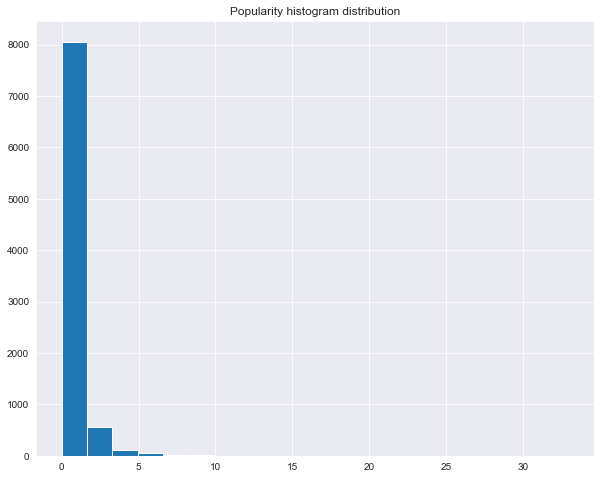

In [107]:
tmdb.popularity.hist(bins=20, figsize=(10, 8))
plt.title('Popularity histogram distribution')

More than half of the movies are not popular, only few have the value of 1 million or more

**Q#1: Are the most popular movies a commercial success? What is their ratio of total profit?**

Let's rank our dataset with `popularity` and `net_profit`

In [108]:
tmdb['popularity_rank'] = tmdb.popularity.rank(method='dense', ascending=False).astype(int)
tmdb['net_profit_rank'] = tmdb.net_profit.rank(method='dense', ascending=False).astype(int)
tmdb[['popularity_rank', 'net_profit_rank']].head()

,popularity_rank,net_profit_rank
id,,
135397,1,4
76341,2,336
262500,5,425
140607,9,2
168259,14,5


Let's take the most popular movies and see their `net_profit_rank`

In [109]:
# Filtering the necessary columns
top_popular = tmdb.sort_values('popularity', axis=0, ascending=False).head(20) \
    [['original_title', 'net_profit', 'popularity_rank', 'net_profit_rank']]

# Scaling the `net_profit_rank` down to `1 - 20`
# the formula is: (((OldValue - OldMin) * (NewMax - NewMin)) / (OldMax - OldMin)) + NewMin
top_popular['net_profit_rank_scale'] = (
    ((top_popular.net_profit_rank - top_popular.net_profit_rank.min()) * 19) \
        / (top_popular.net_profit_rank.max() - top_popular.net_profit_rank.min())) + 1

# substitute values
def substitute(row: pd.DataFrame):
    """substitute `net_profit_rank_scale` by their respective scaled values

    Args:
        row (pd.DataFrame): a row in a dataset

    Returns:
        pd.DataFrame: the same row after substitution has been done
    """
    if row.net_profit_rank > row.popularity_rank:
        row.net_profit_rank_scale = row.net_profit_rank_scale + row.popularity_rank
        
    return row

top_popular = top_popular.apply(lambda x: substitute(x), axis=1)
top_popular.net_profit_rank_scale = np.ceil(top_popular.net_profit_rank_scale).astype(int)

top_popular.head(3)

,original_title,net_profit,popularity_rank,net_profit_rank,net_profit_rank_scale
id,,,,,
135397,Jurassic World,1.363529e+09,1,4,3
76341,Mad Max: Fury Road,2.284364e+08,2,336,8
157336,Interstellar,4.567525e+08,3,115,6


Le't visualize it

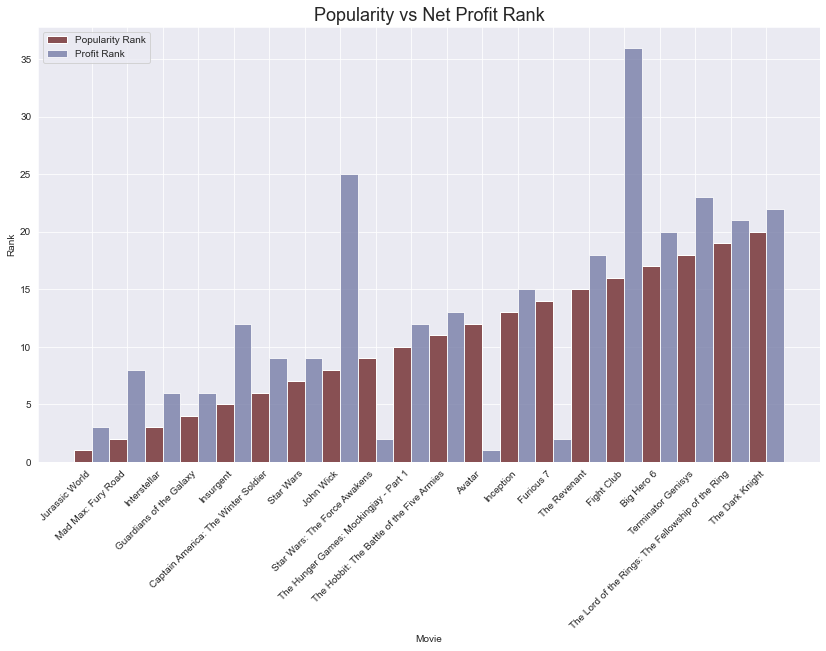

In [110]:
fig, ax = plt.subplots(figsize=(14, 8))

# setup
bar_width = 0.5
x_tick_points = np.linspace(1, 20, 20)

# drawing the popularity_rank
ax.bar(x_tick_points, top_popular.popularity_rank, color='#885053', width=bar_width, label='Popularity Rank')

# drawing the net_profit_rank
ax.bar(x_tick_points + bar_width, top_popular.net_profit_rank_scale, color='#777DA7', width=bar_width, label='Profit Rank', alpha=0.8)

plt.title('Popularity vs Net Profit Rank', fontsize=18)
plt.legend(loc="upper left")
plt.xlabel("Movie")
plt.ylabel("Rank")

plt.xticks(x_tick_points + bar_width / 2, top_popular.original_title, rotation=45, horizontalalignment='right');

In [111]:
# Calculating the `net_profit` total for popular movies and overall
total_profit = tmdb.net_profit.sum()
popular_profit = top_popular.net_profit.sum()

total_profit, popular_profit

(360796019798.944, 14735629594.0)

Visualizing `net_profit` ratio

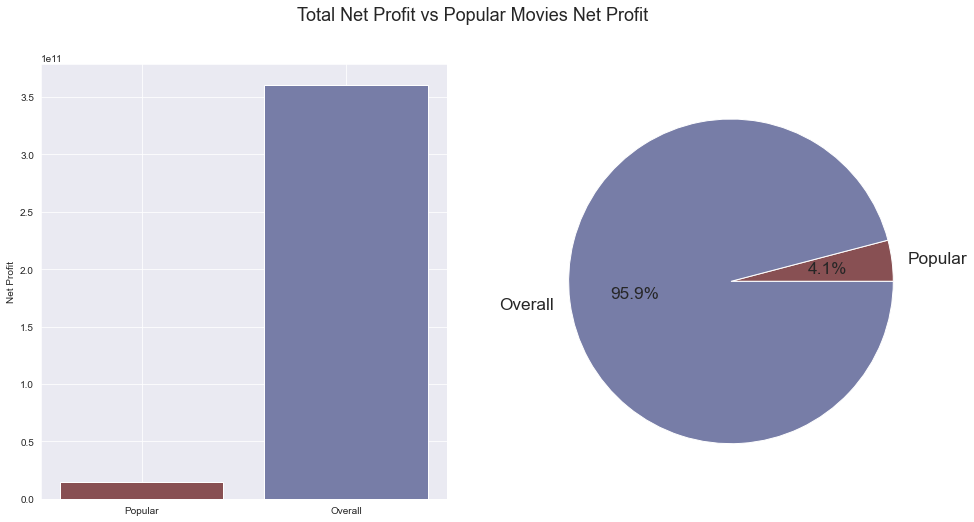

In [112]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Let's plot the bar chart
ax[0].bar([1, 2], [popular_profit, total_profit], color=['#885053', '#777DA7'])
ax[0].set_ylabel('Net Profit')
ax[0].set_xticks([1, 2], ['Popular', 'Overall'])

# Let's plot pie chart
ax[1].pie(
    [popular_profit, total_profit - popular_profit],
    labels=['Popular', 'Overall'],
    colors=['#885053', '#777DA7'], autopct='%.1f%%',
    textprops={'size': 'xx-large'})

plt.suptitle("Total Net Profit vs Popular Movies Net Profit", fontsize=18);

**Q2: Which movies are commercially successful but not popular?**  
  
To answer this question, we already done most of it's part while answering question #1

In [113]:
# ranking using `net_profit` column
net_profit_rank = tmdb.sort_values('net_profit', ascending=False, axis=0)

# Taking only the top 20
unpopular_movies = net_profit_rank.head(20).copy()
del net_profit_rank

# Filter out the popular ones
unpopular_movies = unpopular_movies[~unpopular_movies.index.isin(top_popular.index)]

unpopular_movies[['original_title', 'net_profit', 'popularity_rank', 'net_profit_rank']].style.hide(axis='index')

original_title,net_profit,popularity_rank,net_profit_rank
Titanic,1645034188.000000,119,3
The Avengers,1299557910.000000,28,6
Harry Potter and the Deathly Hallows: Part 2,1202817822.000000,66,7
Avengers: Age of Ultron,1125035767.000000,55,8
Frozen,1124219009.000000,48,9
The Net,1084279658.000000,1381,10
Minions,1082730962.000000,29,11
The Lord of the Rings: The Return of the King,1024888979.000000,32,12
Iron Man 3,1015439994.000000,88,13
Transformers: Dark of the Moon,928746996.000000,2363,14


In [114]:
# Calculating the `net_profit` total for unpopular movies and overall
unpopular_profit = unpopular_movies.net_profit.sum()

total_profit, unpopular_profit

(360796019798.944, 16773481456.0)

Visualizing the `net_profit` ratio

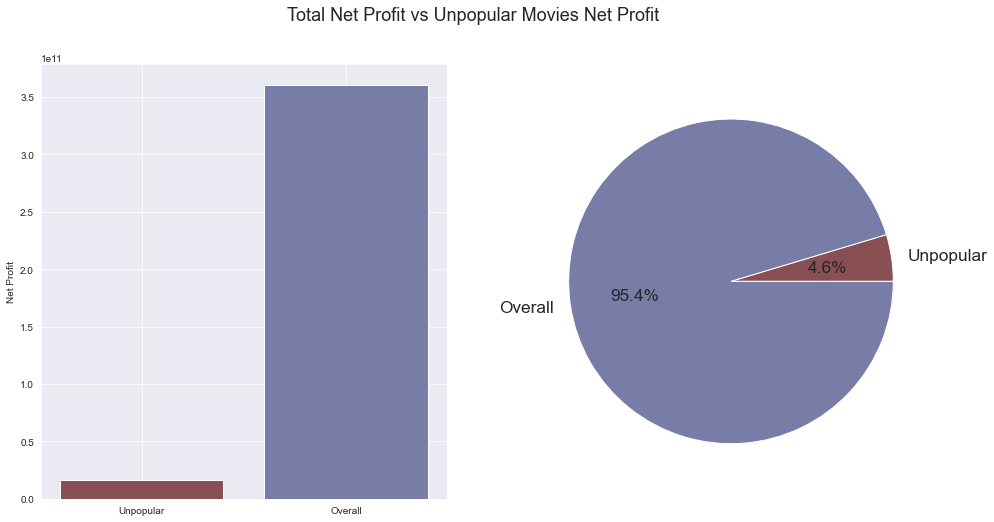

In [115]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Let's plot the bar chart
ax[0].bar([1, 2], [unpopular_profit, total_profit], color=['#885053', '#777DA7'])
ax[0].set_ylabel('Net Profit')
ax[0].set_xticks([1, 2], ['Unpopular', 'Overall'])

# Let's plot pie chart
ax[1].pie(
    [unpopular_profit, total_profit - unpopular_profit],
    labels=['Unpopular', 'Overall'],
    colors=['#885053', '#777DA7'], autopct='%.1f%%',
    textprops={'size': 'xx-large'})

plt.suptitle("Total Net Profit vs Unpopular Movies Net Profit", fontsize=18);

**Q#3. Which movies have the highest `popularity` vs `vote_count` ratio?**

In [116]:
# Let's calculate the rate first
ratio_rank = tmdb.assign(popularity_count_ratio=lambda x: x.vote_count / x.popularity) \
            .sort_values('popularity_count_ratio', ascending=False, axis=0).head(20)

ratio_rank.popularity_count_ratio = ratio_rank.popularity_count_ratio.apply(lambda x: f"{round(x * 100, 2)}%")

ratio_rank[['original_title', 'popularity', 'vote_count', 'popularity_count_ratio']].style.hide(axis='index')

original_title,popularity,vote_count,popularity_count_ratio
G.B.F.,0.000620,0.000082,13.23%
The Hospital,0.000188,0.000010,5.32%
The Internship,0.040858,0.001174,2.87%
X-Men: First Class,0.164515,0.003651,2.22%
X-Men,0.182246,0.002766,1.52%
X-Men: The Last Stand,0.157586,0.002381,1.51%
Mon petit doigt m'a dit...,0.000973,0.000013,1.34%
X2,0.175002,0.002222,1.27%
The Invisible War,0.001372,0.000017,1.24%
The Starving Games,0.015247,0.000151,0.99%


From the above result we can easily deduce, popular movies don't get reviewed most often.

<h3 id="director_questions">Director related Questions</h3>

Let's try to address the Director related questions. Since the `director` column is a multiple value column separated by `|`, we need to take care of it before we start processing.

In [117]:
tmdb.director.sample(10)

id
207933          Brad Anderson
84165             Julie Delpy
103173          Fumihiko Sori
331592         Khalil Sullins
116613              Nick Love
237584        William Monahan
38167             Ryan Murphy
12211     Douglas Aarniokoski
258805             Huck Botko
193              David Carson
Name: director, dtype: object

The above result proves us right, the data point with the id of `170194` has two directors separated by `|`.  
  
To smoothen `director` column we need to expand director column values in to multiple rows. The result we are expecting will be as follows:
| id | Director|
|-------|--------|
| 170194 | John O. Hartman |
| 170194 | Nicholas Mross |

The same movie expanded to two different directors.  
  
To achieve such result, we need to follow the following steps:
1. Split the `director` column string values by `|`
2. Explode the whole dataset on `director` column
  
**NOTE**: When we perform expand operation our dataset size will graw.

In [118]:
tmdb_cpy = tmdb.copy()

Before we begin anything, let's first check the size of our dataset

In [119]:
tmdb.shape

(8827, 16)

In [120]:
# Step 1: splitting
tmdb.director = tmdb.director.str.split("|")
tmdb.director.head()

id
135397     [Colin Trevorrow]
76341        [George Miller]
262500    [Robert Schwentke]
140607         [J.J. Abrams]
168259           [James Wan]
Name: director, dtype: object

From the above output, we can clearly see the results of the `director` column changed to the list.  
  
Now let's explode the dataframe on the `director` column as follows:

In [121]:
# Step 2: exploding the whole dataset
director_df = tmdb.explode('director')
director_df.director.head()

id
135397     Colin Trevorrow
76341        George Miller
262500    Robert Schwentke
140607         J.J. Abrams
168259           James Wan
Name: director, dtype: object

Let's check the shape of our dataframe.

In [122]:
director_df.shape

(9633, 16)

We can witness that our dataset graw from `8827` to `9633`

**Q#1. Who is the most popular Director?**
- How many movies he/she directed?
- What are his/her top 5 commercially successful and flopped movies?
- What year was his/her most popular movie released?

Let's find out who is the most popular director

In [151]:
popular_director = director_df.groupby('director')['popularity'].mean().idxmax()
popular_director

'Colin Trevorrow'

We found out that `Colin Trevorrow` is the most popular director. Let's prove that is true.

In [166]:
# Filtering Colin Movies
colin_movies = director_df[director_df['director'] == 'Colin Trevorrow']
colin_movies.style.hide(['budget', 'revenue', 'cast', 'production_companies', 'vote_count', 'popularity_rank', 'net_profit_rank'], axis='columns')

,popularity,original_title,director,runtime,genres,release_date,vote_average,release_year,net_profit
id,,,,,,,,,
135397,32.985763,Jurassic World,Colin Trevorrow,124.000000,Action|Adventure|Science Fiction|Thriller,2015-06-09 00:00:00,6.500000,2015,1363528810.000000
84332,0.408010,Safety Not Guaranteed,Colin Trevorrow,85.000000,Comedy|Romance|Science Fiction|Drama,2012-06-08 00:00:00,6.700000,2012,3257792.000000


From the above result, we prove that he directed the one and only most popular movie in the whole dataset

**Q#2. Who is the Director with maximum number of Movies Directed?**

**Q#2. How many movies a director direct per year?**
- What are the proportions of their success and flop?

<h3 id="runtime_questions">Runtime Related Questions</h3>

**Q#1. What is the runtime for most popular movies and flopped ones?**

**Q#2. Which movies got high revenue as compared to the same runtime movies?**


**Q#3. Which runtime got a better rate?**


**Q#4. Average runtime of movies each year?**


**Q#5. What is runtime's average popularity rate?**

<h3 id="genre_questions">Genre Related Questions</h3>

**Q#1. Which genres are most popular?**

**Q#2. Which genres are more successful and flopped?**


**Q#3. What is genre's average vote rate?**


**Q#4. What genre is popular each year?**


**Q#5. How many the same genre movies released each year?**

**Q#6. Which genre have had the highest movies released each year?**

<h3 id="company_questions">Production Company Related Questions</h3>

**Q#1. Which production companies are most popular?**

**Q#2. What are the proportion of successful and flopped movies produced?**


**Q#3. How many movies a production company produce per year?**

<h3 id="budget_questions">Budget and Revenue Related Questions</h4>

Before answering each questions, let's visualize the histogram

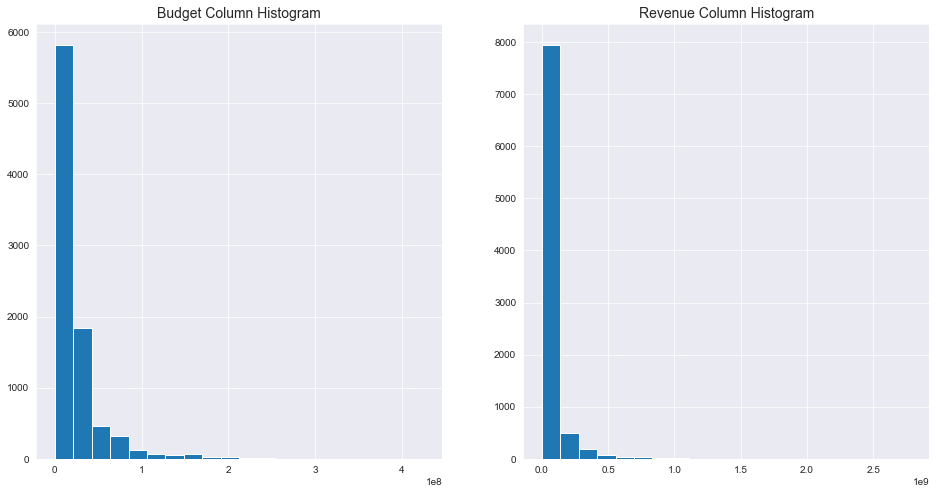

In [123]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax[0].hist(tmdb.budget, bins=20)
ax[0].set_title('Budget Column Histogram', fontsize=14)

ax[1].hist(tmdb.revenue, bins=20)
ax[1].set_title('Revenue Column Histogram', fontsize=14);

Let's address each questions one by one

**Q#1. What is the average budget for both commercial successful as well as flopped movies?**
  
Let's answer the question using the already prepared `successful` and `flopped` dataset

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Let's plot the bar chart
ax.bar([1, 2], [flopped.budget.mean(), successful.budget.mean()], color=['#885053', '#777DA7'])
ax.set_ylabel('Budget')
ax.set_xticks([1, 2], ['Flopped', 'Successful'])

plt.suptitle("Successful vs Flopped Movies Average Budget", fontsize=18);
# Which movie has the highest `net_profit` to `budget` proportion

**Q#2. How much percent of the Movies are Commercially successful as well as Flopped?**  
  
Using the above already filtered data, we can calculate the percent

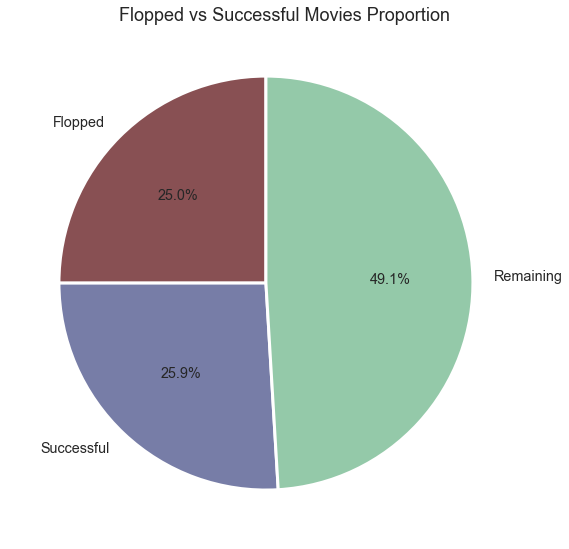

In [126]:
fig, ax = plt.subplots(figsize=(8, 8))
# Let's plot pie chart
plt.pie(
    [flopped.shape[0], successful.shape[0], tmdb.shape[0] - flopped.shape[0] - successful.shape[0]],
    labels=['Flopped', 'Successful', 'Remaining'],
    colors=['#885053', '#777DA7', '#94c9a9ff'], autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90)
plt.tight_layout()

plt.suptitle("Flopped vs Successful Movies Proportion", fontsize=18);

**Q#3. What are the features associated with high revenue?**
- What are their relationship with Production Company, Budget, Director, and Cast features?

**Q#4. Does having more budget mean getting more popularity?**

In [127]:
tmdb.sort_values('budget', ascending=False, axis=0).head(20) \
    [['budget', 'popularity', 'popularity_rank']].style.hide(axis='index')

budget,popularity,popularity_rank
425000000.000000,0.250540,6349
380000000.000000,4.955130,87
300000000.000000,4.965391,86
280000000.000000,5.944927,55
270000000.000000,1.957331,573
260000000.000000,1.588457,832
260000000.000000,2.865684,281
258000000.000000,2.520912,368
255000000.000000,1.214510,1248
250000000.000000,5.076472,83


The above table clearly shows, having more budget doesn't mean more popularity.

**Q#5. What are the movies that got high revenue proportion to their budget?**

In [128]:
net_profit_percentile.head(20)[['original_title', 'budget', 'net_profit', 'net_profit_budget_proportion']].style.hide(axis='index')

original_title,budget,net_profit,net_profit_budget_proportion
"The Karate Kid, Part II",113.000000,115103866.000000,101861828.318584
Into the Night,114.000000,6699886.000000,5877092.982456
From Prada to Nada,93.000000,2499907.000000,2688072.043011
Paranormal Activity,15000.000000,193340800.000000,1288938.666667
The Blair Witch Project,25000.000000,247975000.000000,991900.000000
"Love, Wedding, Marriage",1.000000,1377.000000,137700.000000
Eraserhead,10000.000000,6990000.000000,69900.000000
Pink Flamingos,12000.000000,5988000.000000,49900.000000
Super Size Me,65000.000000,28510078.000000,43861.658462
The Gallows,100000.000000,42564410.000000,42564.410000


**Q#6. Does the `budget` and `revenue` growing over the years?**

<h3 id="release_questions">Released Year Related Questions</h3>

**Q#1. What year was the most successful year in the movie industry?**
- How many successful movies got released that year?
- What was their average budget?
- What is the proportion of successful movies?

Before we tried to answer the question, let's do some useful setups

In [129]:
# Grouping movies in years
year_grouped = tmdb.groupby('release_year')[['popularity', 'budget', 'revenue', 'runtime', 'vote_count', 'vote_average', 'net_profit']]

# The mean of Numerical values for each year
year_mean = year_grouped.mean()

# The number of Movies for each year
year_size = year_grouped.size()

Let's answer the question now

In [130]:
# The most successful year
year_mean[year_mean.net_profit == year_mean.net_profit.max()]

,popularity,budget,revenue,runtime,vote_count,vote_average,net_profit
release_year,,,,,,,
2015,1.173238,2.306223e+07,8.018627e+07,97.742823,0.000344,5.793069,5.712403e+07


In [131]:
shape_success = successful[successful.release_year == 2015].shape
shape_success[0]

358

`358` movies made it to the highest `25%` of `net_profit`

In [132]:
shape_success[0] / year_size[2015] * 100

70.89108910891089

Almost `71%` the movies made in `2015` were successful

**Q#2. What year was the most unsuccessful year in the movie industry?**
- How many flopped movies got released that year?
- What is the proportion of unsuccessful movies

In [133]:
# The most unsuccessful year
year_mean[year_mean.net_profit == year_mean.net_profit.min()]

,popularity,budget,revenue,runtime,vote_count,vote_average,net_profit
release_year,,,,,,,
1966,0.308457,2.259383e+06,3.326440e+06,108.590909,0.000032,6.086364,1.067058e+06


In [134]:
shape_flopped = flopped[flopped.release_year == 1966].shape
shape_flopped[0]

7

In [135]:
shape_flopped[0] / year_size[1966] * 100

15.909090909090908

Almost `16%` of the movies made in year `1966` were unsuccessful but they played a huge part.

**Q#3. Which month has the highest released number of movies?**
- Every year
- Over all

Before we answer the questions, let's group the dataset using `year` and `month`

In [136]:
# Let's group our data with year and month
year_month_group = tmdb.groupby([tmdb.release_date.dt.year, tmdb.release_date.dt.month_name()])

Since we are releasing the maximum number release, we can count the occurances of `original_title`

In [137]:
# Counting the number of `original_title`
year_month_count = year_month_group['original_title'].agg('count')

# Finding the maximum value for each month
year_month_max = year_month_count.loc[year_month_count.groupby(level=0).idxmax()]

# Changing the index names
year_month_max.index.names = ['year', 'month']

# Let's check the values
year_month_max.head(10)

year  month   
1960  August       5
1961  December     6
1962  June         6
1963  June        10
1964  October      8
1965  June         8
1966  December     9
1967  December     7
1968  December     5
1969  December     8
Name: original_title, dtype: int64

As we can see form the above output, for each year we have different months.  
  
Let's visualize them in graph

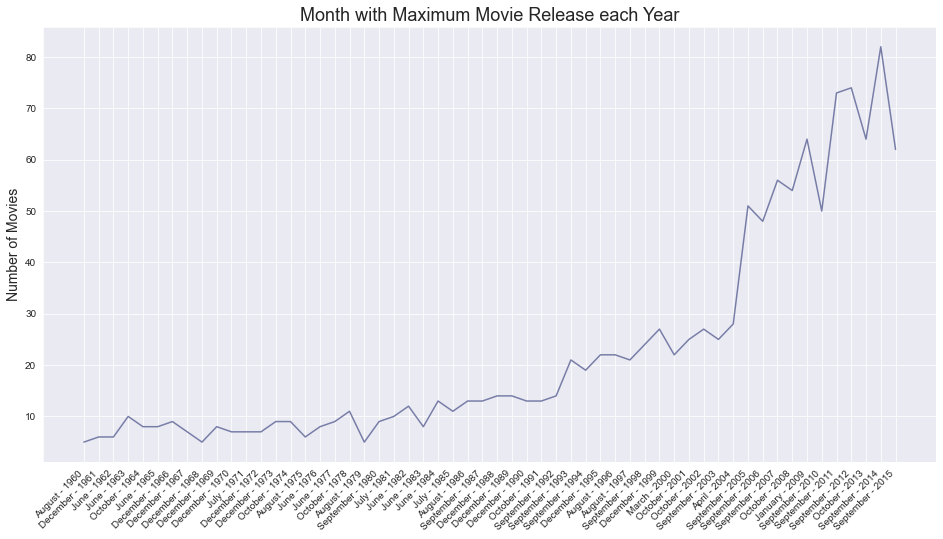

In [138]:
# Preparing tick labels for x-axis
x_ticks = [f"{x[1]} - {x[0]}" for x in list(year_month_max.index)]
length = len(x_ticks)
x_tick_points = np.linspace(1, length, length)

fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(x_tick_points, year_month_max, color="#777da7ff", label=x_tick_points)
plt.title("Month with Maximum Movie Release each Year", fontsize=18)
plt.xticks(x_tick_points, x_ticks, rotation=45, horizontalalignment='right')
plt.ylabel("Number of Movies", fontsize=14);

Now let's take a look what month have the highest movie release for the whole dataset

In [139]:
# Grouping the data
month_group = tmdb.groupby(tmdb.release_date.dt.month_name())

# As we did above, let's count the occurances of `original_title`
month_group_count = month_group.original_title.size()

# Let's sort the values to make highest and lowest month visualization easy
month_group_count = month_group_count.sort_values()

month_group_count

release_date
February      564
April         647
July          648
March         652
May           670
January       679
November      680
June          701
August        752
December      825
October       948
September    1061
Name: original_title, dtype: int64

Let's draw the graph and visualize it

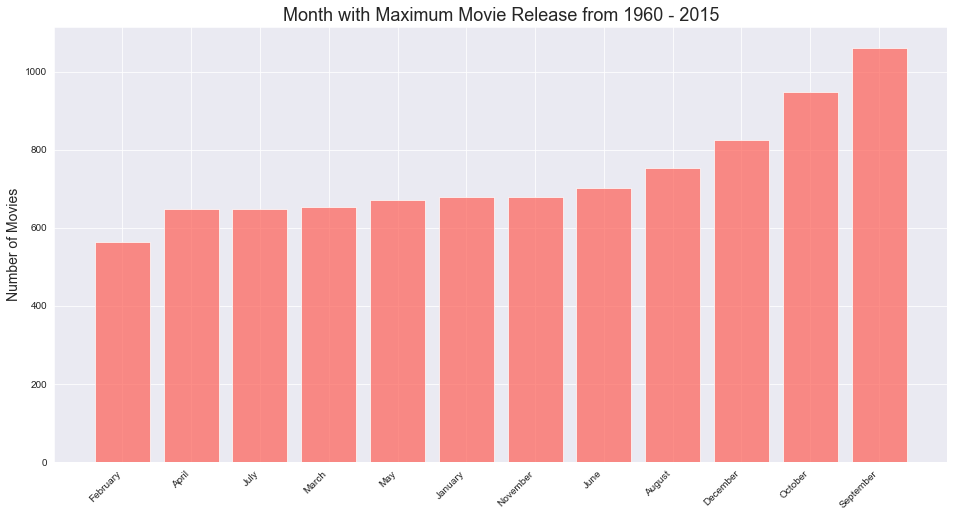

In [140]:
# Preparing tick labels for x-axis
length = len(month_group_count)
x_tick_points = np.linspace(1, length, length)

fig, ax = plt.subplots(figsize=(16, 8))
plt.bar(x_tick_points, month_group_count, color="#fe5f55ff", label=x_tick_points, alpha=0.7)
plt.title("Month with Maximum Movie Release from 1960 - 2015", fontsize=18)
plt.xticks(x_tick_points, list(month_group_count.index), rotation=45, horizontalalignment='right')
plt.ylabel("Number of Movies", fontsize=14);

**Q#4. Which month made the Highest Average Net Profit?**
- Every year
- Over all

To answer this question, we can use the groups we created in the above question

In [141]:
# Calculating the average for the each month in the year
year_month_average = year_month_group.net_profit.mean()

# Finding the month with maximum average `net_profit`
year_month_average = year_month_average.loc[year_month_average.groupby(level=0).idxmax()]

# Changing index names
year_month_average.index.names = ['Year', 'Month']

year_month_average.head(10)

Year  Month    
1960  October      1.248628e+07
1961  January      4.740767e+07
1962  November     2.018096e+07
1963  October      2.625129e+07
1964  August       5.263636e+07
1965  March        8.321121e+07
1966  August       6.885000e+06
1967  October      7.551438e+07
1968  April        1.614201e+07
1969  September    2.250462e+07
Name: net_profit, dtype: float64

As we can see from the above output, we have different values for the month and average `net_profit` values.  
  
Let's visualize it in a graph

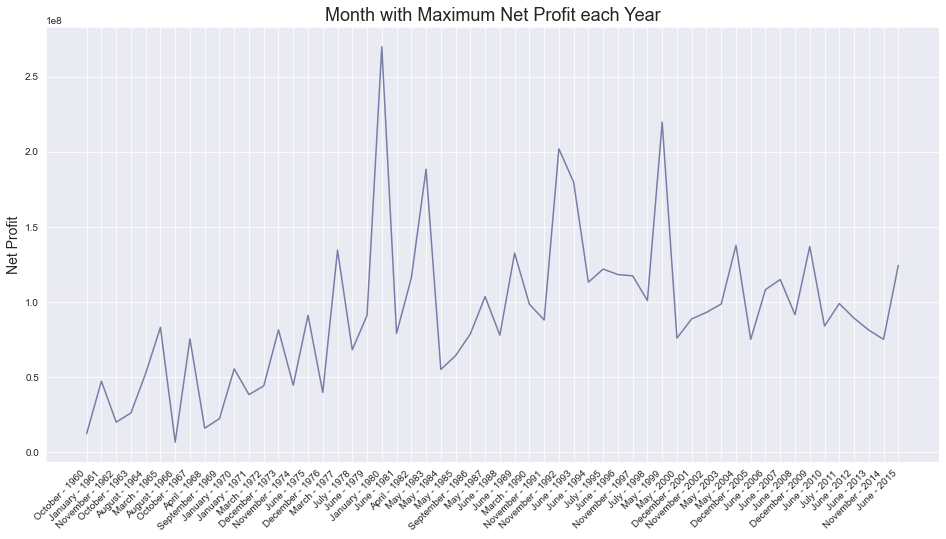

In [142]:
# Preparing tick labels for x-axis
x_ticks = [f"{x[1]} - {x[0]}" for x in list(year_month_average.index)]
length = len(x_ticks)
x_tick_points = np.linspace(1, length, length)

fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(x_tick_points, year_month_average, color="#777da7ff", label=x_tick_points)
plt.title("Month with Maximum Net Profit each Year", fontsize=18)
plt.xticks(x_tick_points, x_ticks, rotation=45, horizontalalignment='right')
plt.ylabel("Net Profit", fontsize=14);

From the above graph, the average `net_profit` is getting higher and higher even though it's is reaching high pick at times.  
  
Let's now compute for all the months starting from 1960 - 2015

In [143]:
# Again let's use the group we have already made for Q#3
# Let's find the mean for `net_profit` column
month_group_average = month_group.net_profit.mean()

# Let's sort the values to make visualization easy
month_group_average = month_group_average.sort_values()

# Let's check the values
month_group_average

release_date
January      2.300403e+07
September    2.358568e+07
February     2.739781e+07
October      2.917670e+07
August       2.924537e+07
April        3.550119e+07
March        3.738524e+07
December     5.359209e+07
July         5.432829e+07
November     5.509620e+07
May          6.120493e+07
June         7.105864e+07
Name: net_profit, dtype: float64

Let's visualize it using graph

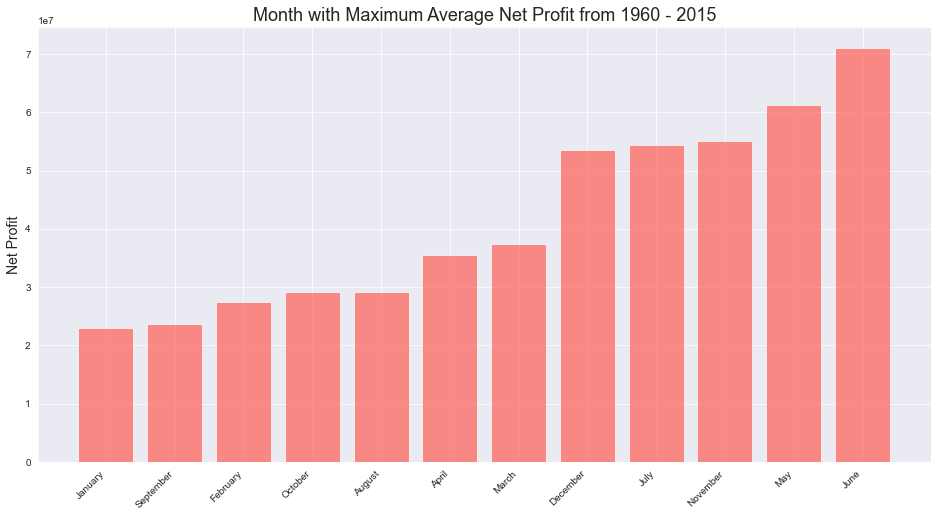

In [144]:
# Preparing tick labels for x-axis
length = len(month_group_average)
x_tick_points = np.linspace(1, length, length)

fig, ax = plt.subplots(figsize=(16, 8))
plt.bar(x_tick_points, month_group_average, color="#fe5f55ff", label=x_tick_points, alpha=0.7)
plt.title("Month with Maximum Average Net Profit from 1960 - 2015", fontsize=18)
plt.xticks(x_tick_points, list(month_group_average.index), rotation=45, horizontalalignment='right')
plt.ylabel("Net Profit", fontsize=14);

**Q#5. What is the average popularity for each year?**
- Which year has the highest and lowest values

Text(0.5, 1.0, 'Average Popularity of Movies every Years')

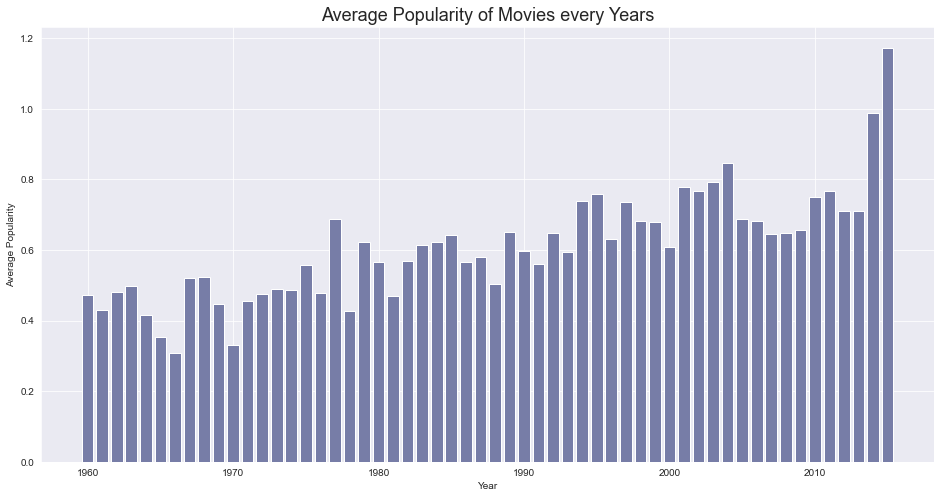

In [145]:
fig, ax = plt.subplots(figsize=(16, 8))

plt.bar(year_mean.index, year_mean.popularity, color='#777da7ff')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title("Average Popularity of Movies every Years", fontsize=18)

**Q#7. Does the number of released movies increased over the rears?**

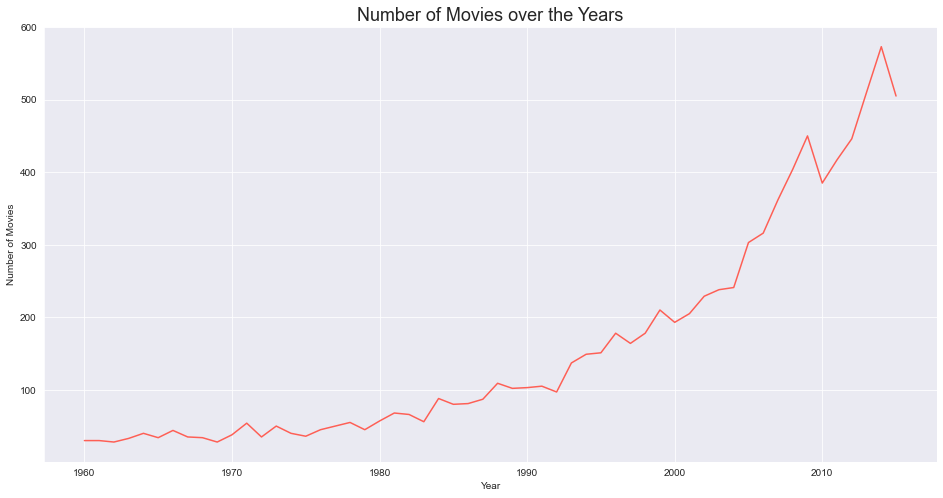

In [146]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(year_size.index, year_size, color='#fe5f55ff')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title("Number of Movies over the Years", fontsize=18);

<h2 id="conclusion">Conclusion</h2>

The dataset isn't a collection of clean data points. It is filled with a bunch of outliers for most of it's columns which makes the data analysis so difficult.  
For example, let's take a look at the box plot graph of `budget`, `revenue`, and `popularity` columns to visualize how disturbing the outliers are.

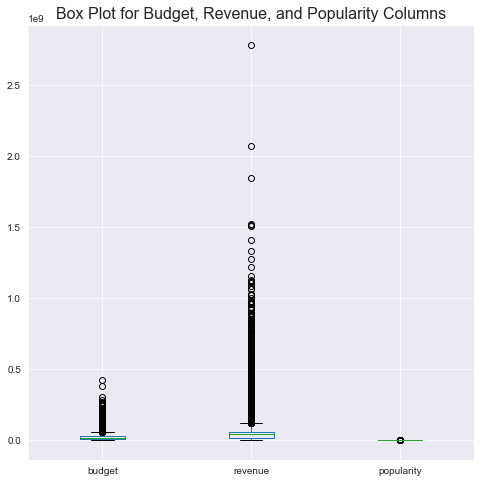

In [213]:
tmdb.boxplot(column=['budget', 'revenue', 'popularity'], figsize=(8, 8))
plt.title("Box Plot for Budget, Revenue, and Popularity Columns", fontsize=16);

From the above plot we clearly see a huge amount of our data points fall into the outliers. Dropping the outliers lead to loosing a huge portion of our dataset which is a risky; we might loose a crucial data along. Analysing as they are is also a risk since they will lead to a falsy justification. So, I took the risk of analysing the dataset as they are. The above results might be falsy result when the dataset is analysed after removing the outliers.  